### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from PIL import Image
from tifffile import imsave

# Modules
from RICM_VESICLE import RICM, RICM_diaphragm
from FITTING import Fit_Gaussian

### Determine the Shot and the GUV


In [2]:
# Determine the Shot and the GUV
experiment = 'Remy/green_and_blue'
shot, guv  = 2, 1
whole_img  = f'vesicle{shot}_1'
object_img = f'vesicle{shot}_1-{guv}'

### Read the whole RICM image to determine the base line

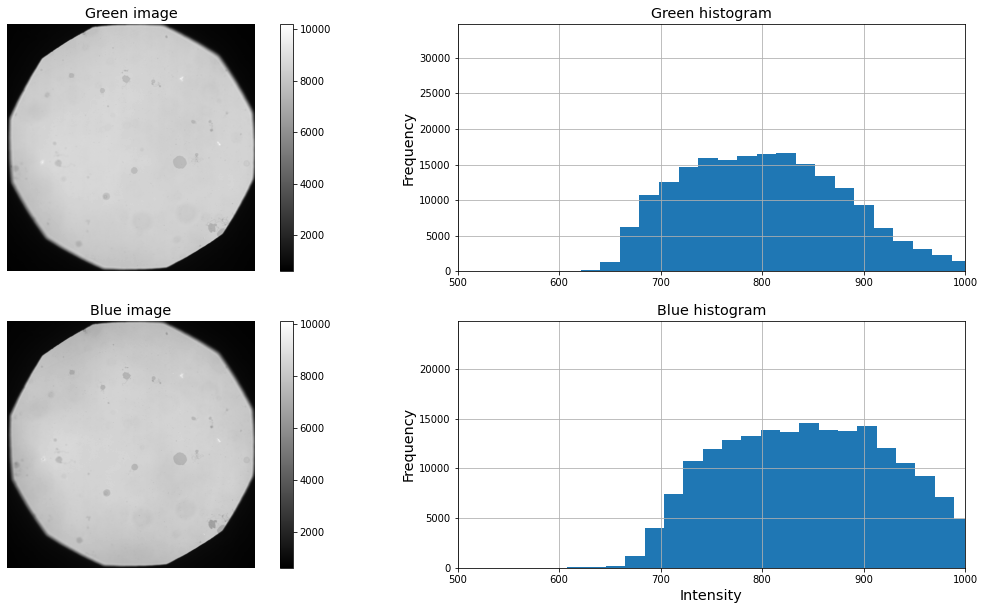

In [3]:
# Read the RICM image
ricm_img = io.imread(f"Data/{experiment}/data/{whole_img}.tif")

# display the image and it's histogram
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.imshow(ricm_img[0], cmap="gray")
plt.axis('off')
plt.title('Green image', fontsize='x-large')
plt.colorbar();

plt.subplot(222)
plt.hist(ricm_img[0].ravel(), bins=500)
plt.title('Green histogram', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.xlim(500,1000)
plt.grid();

plt.subplot(223)
plt.imshow(ricm_img[1], cmap="gray")
plt.axis('off')
plt.title('Blue image', fontsize='x-large')
plt.colorbar();

plt.subplot(224)
plt.hist(ricm_img[1].ravel(), bins=500)
plt.title('Blue histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.xlim(500,1000)
plt.grid();

### Read the GUV image and subtract the base line

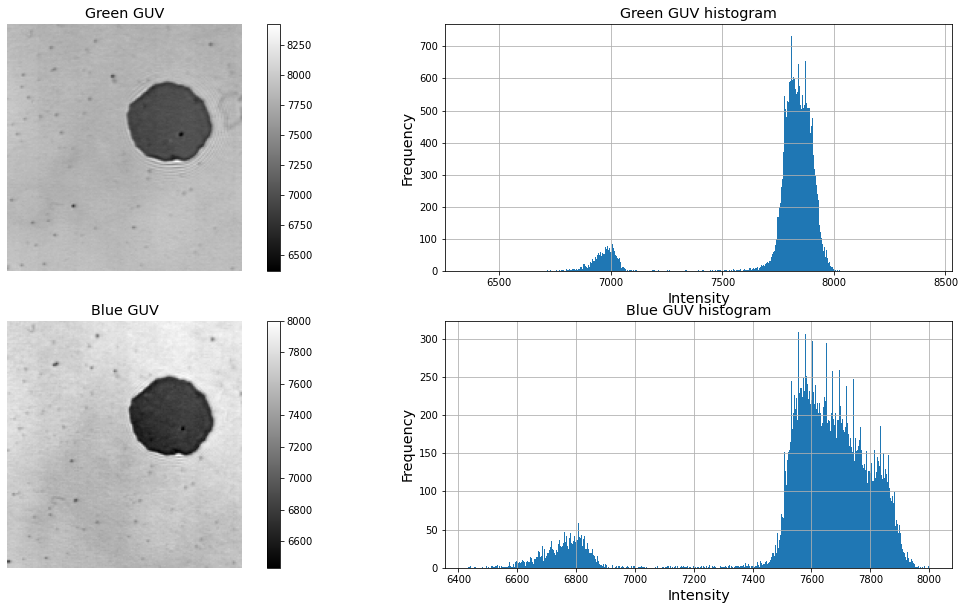

In [4]:
# Read the GUV image
img = io.imread(f"Data/{experiment}/data/{object_img}.tif")

# Subtract the base line
img = img - 600

# display the image and it's histogram
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.imshow(img[0], cmap = "gray")
plt.axis('off')
plt.title('Green GUV', fontsize='x-large')
plt.colorbar();

plt.subplot(222)
plt.hist(img[0].ravel(), bins = 500)
plt.title('Green GUV histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
#plt.xlim(0,3000)
plt.grid();

plt.subplot(223)
plt.imshow(img[1], cmap = "gray")
plt.axis('off')
plt.title('Blue GUV', fontsize='x-large')
plt.colorbar();

plt.subplot(224)
plt.hist(img[1].ravel(), bins = 500)
plt.title('Blue GUV histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
#plt.xlim(0,3000)
plt.grid();

### Define the RICM model for the green channel then fit a gaussian on the adhesion zone

Y0 = 0.01, A = -0.23, h0 = 33.32
Y0 = 0.01, A = -0.23, h0 = 33.32


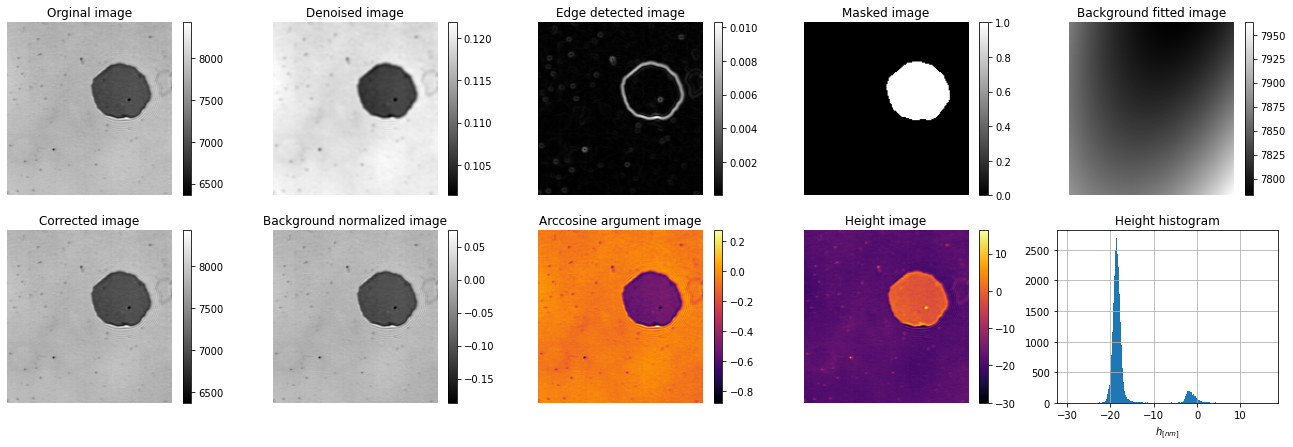

Y0 = 0.01, A = -0.23, h0 = 33.32


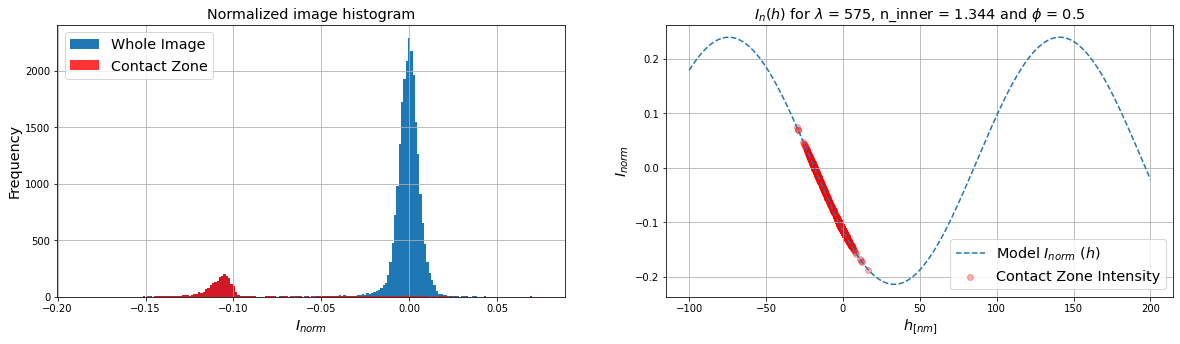

The height of the GUV is -1.46 nm


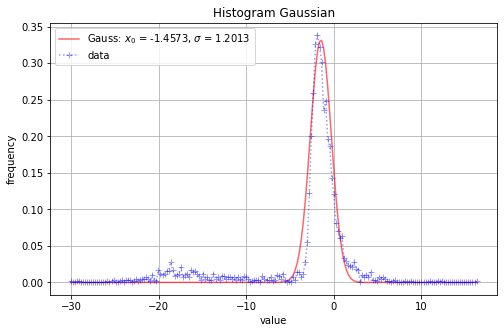

In [5]:
# Define the RICM class with certain n_inner
ricm_green = RICM(img[0], l=575, n_inner=1.344, p=0.5, hole=3)

# Display the way to the RICM height mapping step by step
ricm_green.show_summary(save=True)

# Extract the hieght on the contact zone
i_height, _ = ricm_green.model_fitting(h=np.linspace(-100, 200, 600), show=True)

# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(i_height, normalized=True)
height_green, _ = gauss.hist_fitting(show=True)

# Print the height in nano meter
print(f'The height of the GUV is {height_green:.2f} nm')

### Define the RICM model for the blue channel then fit a gaussian on the adhesion zone

Y0 = 0.02, A = -0.27, h0 = 28.86
Y0 = 0.02, A = -0.27, h0 = 28.86


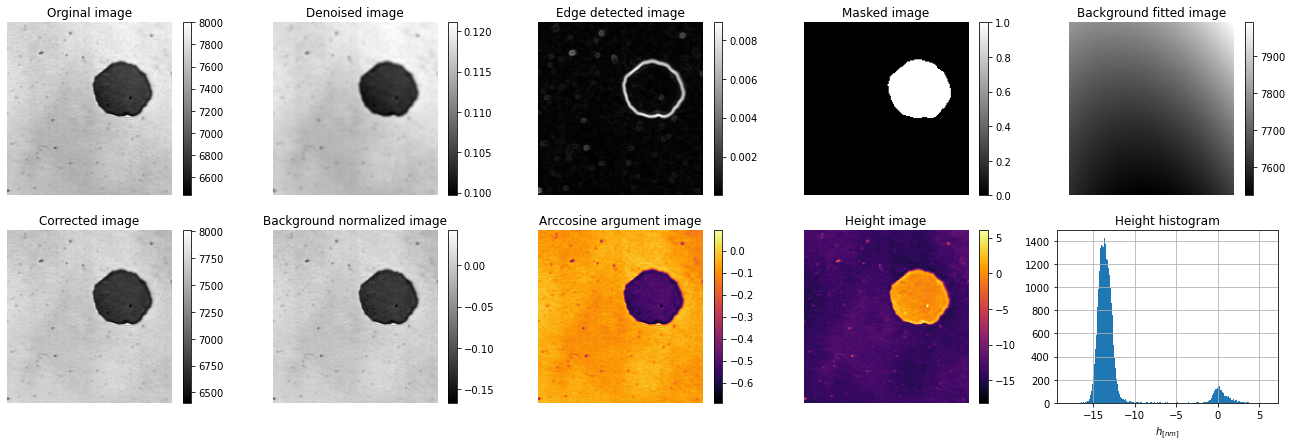

Y0 = 0.02, A = -0.27, h0 = 28.86


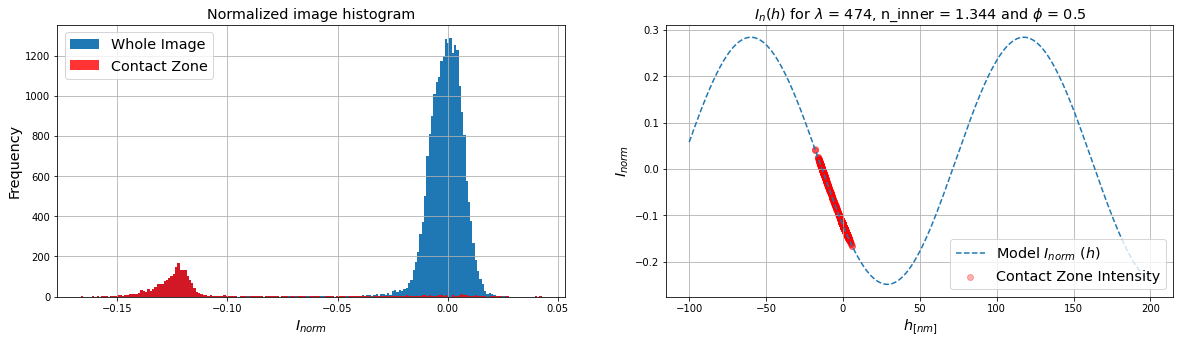

The height of the GUV is 0.25 nm


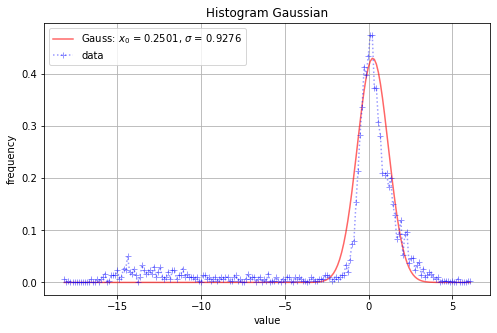

In [6]:
# Define the RICM class with certain n_inner
ricm_blue  = RICM(img[1], l=474, n_inner=1.344, p=0.5, hole=3)

# Display the way to the RICM height mapping step by step
ricm_blue.show_summary(save=True)

# Extract the hieght on the contact zone
i_height, _ = ricm_blue.model_fitting(h=np.linspace(-100, 200, 600), show=True)

# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(i_height, normalized=True)
height_blue, _ = gauss.hist_fitting(show=True)

# Print the height in nano meter
print(f'The height of the GUV is {height_blue:.2f} nm')

### Save the images in tif format

In [7]:
# Create the results directory
path = f'Data/{experiment}/results/{object_img}_{height_green:.2f}nm_{height_blue:.2f}nm'
try:
    # Create a directory for the results
    os.mkdir(path)
except:
    print(f'The same exact measurments have been saved before in:\n{path}')

# Save the results
imsave(f'{path}/original.tif', img)
imsave(f'{path}/nl_denoise.tif', np.stack((ricm_green.nl_denoise(),ricm_blue.nl_denoise())))
imsave(f'{path}/edge_detection.tif', np.stack((ricm_green.edge_detection(),ricm_blue.edge_detection())))
imsave(f'{path}/mask.tif', np.stack((ricm_green.mask(),ricm_blue.mask())))
imsave(f'{path}/background_fitting.tif', np.stack((ricm_green.background_fitting(),ricm_blue.background_fitting())))
imsave(f'{path}/correct.tif', np.stack((ricm_green.correct(),ricm_blue.correct())))
imsave(f'{path}/background_normalization.tif', np.stack((ricm_green.background_normalization(),ricm_blue.background_normalization())))
imsave(f'{path}/height.tif', np.stack((ricm_green.height(),ricm_blue.height())))

The same exact measurments have been saved before in:
Data/Remy/green_and_blue/results/vesicle2_1-1_-1.46nm_0.25nm
Y0 = 0.01, A = -0.23, h0 = 33.32
Y0 = 0.02, A = -0.27, h0 = 28.86
